In [78]:
import skmob
import pandas as pd
import json
from datetime import datetime
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings(action='once')

In [2]:
data = pd.read_csv('HistoryLoc.csv')

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [334]:
data.tail()

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,lat,lon,date
727,1,37.863272,-122.258473,2019-11-19 22:54:09.000
728,1,37.862779,-122.256997,2019-11-20 00:11:49.002
729,1,37.862735,-122.256969,2019-11-20 00:12:34.403
730,1,37.862753,-122.256994,2019-11-20 00:12:52.181
731,1,37.862914,-122.257008,2019-11-20 01:18:08.998


In [4]:
data['user_id']=1
data = data[['user_id', 'lat', 'lon','date']] 
data.head()

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,lat,lon,date
0,1,37.863434,-122.255653,2019-10-23 14:03:51.005
1,1,37.870546,-122.255211,2019-10-23 16:10:56.697
2,1,37.874466,-122.258199,2019-10-23 16:54:23.999
3,1,37.875027,-122.258451,2019-10-23 17:17:06.998
4,1,37.873863,-122.258028,2019-10-23 17:25:28.000


In [106]:
# Create a TrajDataFrame from a DataFrame
tdf = skmob.TrajDataFrame(data, 
                          latitude='lat', 
                          datetime='date', 
                          longitude='lon')

print(type(tdf))
tdf.head()

<class 'skmob.core.trajectorydataframe.TrajDataFrame'>


C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,lat,lng,datetime
0,1,37.863434,-122.255653,2019-10-23 14:03:51.005
1,1,37.870546,-122.255211,2019-10-23 16:10:56.697
2,1,37.874466,-122.258199,2019-10-23 16:54:23.999
3,1,37.875027,-122.258451,2019-10-23 17:17:06.998
4,1,37.873863,-122.258028,2019-10-23 17:25:28.000


In [6]:
## plot trajectory of data
tdf.plot_trajectory(zoom=11, weight=3, opacity=0.9, tiles='Stamen Toner')

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\scikit_mobility-1.0-py3.7.egg\skmob\utils\plot.py:143: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [7]:
## Plotting all points before filtering 
tdf['leaving_datetime'] = tdf.datetime
user0_map = tdf.plot_stops(zoom=11)
# plot the trajectory of the user
tdf.plot_trajectory(map_f=user0_map)

In [107]:
## Print some statistics about the data
print('-------------Data Statistics-------------------')
print('# users: %s' %len(tdf.user_id.unique()))
print('# points: %s' %len(tdf))
print('time window: %s' 
      %(tdf.iloc[-1].datetime - tdf.iloc[0].datetime))

-------------Data Statistics-------------------
# users: 1
# points: 732
time window: 27 days 11:14:17.993000


C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Filtering points

In [108]:
## Filtering points
from skmob.preprocessing import filtering
ftdf = filtering.filter(tdf, max_speed_kmh=500.)
ftdf.parameters

{'filter': {'function': 'filter',
  'max_speed_kmh': 500.0,
  'include_loops': False,
  'speed_kmh': 5.0,
  'max_loop': 6,
  'ratio_max': 0.25}}

In [109]:
print('Points of the raw trajectory:\t\t%s'%len(tdf))
print('Points of the filtered trajectory:\t%s'%len(ftdf))
print('Filtered points:\t\t\t%s'%(len(tdf)-len(ftdf)))

Points of the raw trajectory:		732
Points of the filtered trajectory:	719
Filtered points:			13


#### Compressing points

In [110]:
from skmob.preprocessing import compression
ctdf = compression.compress(ftdf, spatial_radius_km=1)
ctdf.head()

,user_id,lat,lng,datetime
0,1,37.866990,-122.255432,2019-10-23 14:03:51.005
1,1,37.873734,-122.258199,2019-10-23 16:54:23.999
2,1,37.867648,-122.261491,2019-10-23 22:13:15.000
3,1,37.868965,-122.256403,2019-10-24 15:07:39.572
4,1,37.864421,-122.263986,2019-10-25 18:52:35.000


In [332]:
print(len(ctdf))
# user0_map = ctdf.plot_stops(zoom=11)
# # plot the trajectory of the user
# ctdf.plot_trajectory(map_f=user0_map) 

153


C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Stop detection

In [113]:
from skmob.preprocessing import detection
stdf = detection.stops(ctdf, stop_radius_factor=0.5, \
            minutes_for_a_stop=20.0, spatial_radius_km=0.2, 
                       leaving_time=True)
stdf

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,lat,lng,datetime,leaving_datetime
0,1,37.866990,-122.255432,2019-10-23 14:03:51.005,2019-10-23 16:54:23.999
1,1,37.873734,-122.258199,2019-10-23 16:54:23.999,2019-10-23 22:13:15.000
2,1,37.867648,-122.261491,2019-10-23 22:13:15.000,2019-10-26 17:27:10.999
3,1,37.786798,-122.183291,2019-10-26 17:37:19.085,2019-10-26 21:16:21.000
4,1,37.858296,-122.244865,2019-10-26 21:18:50.893,2019-10-27 16:00:58.002
5,1,37.863036,-122.257841,2019-10-27 16:00:58.002,2019-10-28 19:39:25.050
6,1,37.865265,-122.266273,2019-10-28 19:39:25.050,2019-10-28 21:48:13.999
7,1,37.866201,-122.257670,2019-10-28 21:48:13.999,2019-10-29 19:41:13.999
8,1,37.868978,-122.272755,2019-10-29 19:41:13.999,2019-10-29 20:47:36.998
9,1,37.862705,-122.256706,2019-10-29 20:47:36.998,2019-10-30 15:41:38.999


In [14]:
stdf.parameters

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'filter': {'function': 'filter',
  'max_speed_kmh': 500.0,
  'include_loops': False,
  'speed_kmh': 5.0,
  'max_loop': 6,
  'ratio_max': 0.25},
 'compress': {'function': 'compress', 'spatial_radius_km': 1},
 'detect': {'function': 'stops',
  'stop_radius_factor': 0.5,
  'minutes_for_a_stop': 20.0,
  'spatial_radius_km': 0.2,
  'leaving_time': True,
  'no_data_for_minutes': 1000000000000.0,
  'min_speed_kmh': None}}

In [15]:
## Visualize compressed data with stop detection
map_f = stdf.plot_trajectory(max_points=1000, hex_color=-1, start_end_markers=False)
stdf.plot_stops(map_f=map_f, hex_color=-1)

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\scikit_mobility-1.0-py3.7.egg\skmob\utils\plot.py:245: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [16]:
stdf.head(16)

,user_id,lat,lng,datetime,leaving_datetime
0,1,37.866990,-122.255432,2019-10-23 14:03:51.005,2019-10-23 16:54:23.999
1,1,37.873734,-122.258199,2019-10-23 16:54:23.999,2019-10-23 22:13:15.000
2,1,37.867648,-122.261491,2019-10-23 22:13:15.000,2019-10-26 17:27:10.999
3,1,37.786798,-122.183291,2019-10-26 17:37:19.085,2019-10-26 21:16:21.000
4,1,37.858296,-122.244865,2019-10-26 21:18:50.893,2019-10-27 16:00:58.002
5,1,37.863036,-122.257841,2019-10-27 16:00:58.002,2019-10-28 19:39:25.050
6,1,37.865265,-122.266273,2019-10-28 19:39:25.050,2019-10-28 21:48:13.999
7,1,37.866201,-122.257670,2019-10-28 21:48:13.999,2019-10-29 19:41:13.999
8,1,37.868978,-122.272755,2019-10-29 19:41:13.999,2019-10-29 20:47:36.998
9,1,37.862705,-122.256706,2019-10-29 20:47:36.998,2019-10-30 15:41:38.999


In [17]:
# select all points between the first two stops
dt1 = stdf.iloc[0]['datetime']
dt2 = stdf.iloc[1]['leaving_datetime']
tid1_tdf = tdf[(tdf.datetime >= dt1) 
                           & (tdf.datetime <= dt2)]
tid1_tdf.head()

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,lat,lng,datetime,leaving_datetime
0,1,37.863434,-122.255653,2019-10-23 14:03:51.005,2019-10-23 14:03:51.005
1,1,37.870546,-122.255211,2019-10-23 16:10:56.697,2019-10-23 16:10:56.697
2,1,37.874466,-122.258199,2019-10-23 16:54:23.999,2019-10-23 16:54:23.999
3,1,37.875027,-122.258451,2019-10-23 17:17:06.998,2019-10-23 17:17:06.998
4,1,37.873863,-122.258028,2019-10-23 17:25:28.000,2019-10-23 17:25:28.000


In [18]:
# plot the trip
tid1_map = tid1_tdf.plot_trajectory(zoom=13, weight=5, opacity=0.9, tiles='Stamen Toner', )
tid1_map

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\scikit_mobility-1.0-py3.7.egg\skmob\utils\plot.py:143: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [140]:
# # tid1_tdf.plot_stops(map_f=map_f, hex_color=-1)
# map_f = tid1_tdf.plot_trajectory(max_points=1000, hex_color=-1, start_end_markers=False)
# tid1_tdf.plot_stops(map_f=map_f, hex_color=-1)
# tid1_tdf

,user_id,lat,lng,datetime
263,1,42.388890,-71.184360,2019-11-07 12:22:28.000
264,1,42.388801,-71.184235,2019-11-07 12:24:25.000
265,1,42.387812,-71.185834,2019-11-07 17:34:16.010
266,1,42.380549,-71.187042,2019-11-07 17:36:31.000
267,1,42.370180,-71.191330,2019-11-07 17:38:37.000
...,...,...,...,...
383,1,42.388684,-71.184143,2019-11-09 15:03:34.000
384,1,42.387816,-71.185304,2019-11-10 12:45:42.924
385,1,42.387830,-71.185537,2019-11-10 12:48:03.999
386,1,42.385621,-71.184132,2019-11-10 12:49:27.000


#### 1.  Present more than one map as the ones shown in class for a 2 day trajectory when changing the parameters used to detect the stops. Meaning, show a few maps similar to the map below, changing various parameters of stop detection until you are satisfied with the results of the 2 days.


In [141]:
# select all points between the 8th and 10th stop
dt1 = stdf.iloc[19]['datetime']
dt2 = stdf.iloc[31]['leaving_datetime']
tid1_tdf = stdf[(stdf.datetime >= dt1) 
                           & (stdf.datetime <= dt2)]
tid1_tdf.head()

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,lat,lng,datetime,leaving_datetime
19,1,42.388307,-71.185097,2019-11-07 12:22:28.000,2019-11-07 17:38:37.000
20,1,42.370129,-71.192634,2019-11-07 17:38:37.000,2019-11-07 19:32:54.000
21,1,42.387463,-71.187457,2019-11-07 19:32:54.000,2019-11-08 12:32:35.000
22,1,42.382343,-71.174558,2019-11-08 12:32:35.000,2019-11-08 13:18:23.999
23,1,42.390689,-71.140426,2019-11-08 13:22:23.999,2019-11-08 16:06:46.162


In [142]:
# # tid1_tdf.plot_stops(map_f=map_f, hex_color=-1)
map_f = tid1_tdf.plot_trajectory(max_points=1000, hex_color=-1, start_end_markers=False)
tid1_tdf.plot_stops(map_f=map_f, hex_color=-1)


C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\scikit_mobility-1.0-py3.7.egg\skmob\utils\plot.py:245: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.strftime(t0, '%Y/%m/%d %H:%M'),


In [143]:
# # plot the trip
# tid1_map = tid1_tdf.plot_trajectory(zoom=13, weight=5, opacity=0.9, tiles='Stamen Toner', )
# tid1_map

In [22]:
# map_f = stdf.plot_trajectory(max_points=1000, hex_color=-1, start_end_markers=False)
# tid1_tdf.plot_stops(map_f=map_f, hex_color=-1)

In [144]:
## changing stop detection parameters
stdf_1 = detection.stops(ctdf, stop_radius_factor=0.7, \
            minutes_for_a_stop=20.0, spatial_radius_km=0.2, 
                       leaving_time=True)
stdf_1

,user_id,lat,lng,datetime,leaving_datetime
0,1,37.866990,-122.255432,2019-10-23 14:03:51.005,2019-10-23 16:54:23.999
1,1,37.873734,-122.258199,2019-10-23 16:54:23.999,2019-10-23 22:13:15.000
2,1,37.867648,-122.261491,2019-10-23 22:13:15.000,2019-10-26 17:27:10.999
3,1,37.786798,-122.183291,2019-10-26 17:37:19.085,2019-10-26 21:16:21.000
4,1,37.858296,-122.244865,2019-10-26 21:18:50.893,2019-10-27 16:00:58.002
5,1,37.863036,-122.257841,2019-10-27 16:00:58.002,2019-10-28 19:39:25.050
6,1,37.865265,-122.266273,2019-10-28 19:39:25.050,2019-10-28 21:48:13.999
7,1,37.866201,-122.257670,2019-10-28 21:48:13.999,2019-10-29 19:41:13.999
8,1,37.868978,-122.272755,2019-10-29 19:41:13.999,2019-10-29 20:47:36.998
9,1,37.862705,-122.256706,2019-10-29 20:47:36.998,2019-10-30 15:41:38.999


In [165]:
# select all points between the 8th and 10th stop
dt1 = stdf_1.iloc[15]['datetime']
dt2 = stdf_1.iloc[27]['leaving_datetime']
tid1_tdf1 = stdf_1[(stdf_1.datetime >= dt1) 
                           & (stdf_1.datetime <= dt2)]
# plot the trip
# tid1_map = tid1_tdf1.plot_trajectory(zoom=13, weight=5, opacity=0.9, tiles='Stamen Toner', )
# tid1_map
map_f = tid1_tdf1.plot_trajectory(max_points=1000, hex_color=-1, start_end_markers=False)
tid1_tdf1.plot_stops(map_f=map_f, hex_color=-1)



In [164]:
## changing stop detection parameters
stdf_2 = detection.stops(ctdf, stop_radius_factor=0.7, \
            minutes_for_a_stop=10.0, spatial_radius_km=0.5, 
                       leaving_time=True)
# display(stdf_2)
# select all points between the 8th and 10th stop
dt1 = stdf_2.iloc[15]['datetime']
dt2 = stdf_2.iloc[27]['leaving_datetime']
tid1_tdf1 = stdf_1[(stdf_2.datetime >= dt1) 
                           & (stdf_2.datetime <= dt2)]
# plot the trip
# tid1_map = tid1_tdf1.plot_trajectory(zoom=13, weight=5, opacity=0.9, tiles='Stamen Toner', )
# tid1_map
map_f = tid1_tdf1.plot_trajectory(max_points=1000, hex_color=-1, start_end_markers=False)
tid1_tdf1.plot_stops(map_f=map_f, hex_color=-1)


C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\scikit_mobility-1.0-py3.7.egg\skmob\core\trajectorydataframe.py:335: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(TrajDataFrame, self).__getitem__(key)


In [163]:
## changing stop detection parameters
stdf_3 = detection.stops(ctdf, stop_radius_factor=0.8, \
            minutes_for_a_stop=30.0, spatial_radius_km=1, 
                       leaving_time=True)
# display(stdf_3)
# select all points between the 8th and 10th stop
dt1 = stdf_3.iloc[12]['datetime']
dt2 = stdf_3.iloc[23]['leaving_datetime']
tid1_tdf1 = stdf_3[(stdf_3.datetime >= dt1) 
                           & (stdf_3.datetime <= dt2)]
# plot the trip
# tid1_map = tid1_tdf1.plot_trajectory(zoom=13, weight=5, opacity=0.9, tiles='Stamen Toner', )
# tid1_map
map_f = tid1_tdf1.plot_trajectory(max_points=1000, hex_color=-1, start_end_markers=False)
tid1_tdf1.plot_stops(map_f=map_f, hex_color=-1)


C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\scikit_mobility-1.0-py3.7.egg\skmob\utils\plot.py:245: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.strftime(t0, '%Y/%m/%d %H:%M'),


In [161]:
## changing stop detection parameters
stdf_4 = detection.stops(ctdf, stop_radius_factor=0.2, 
            minutes_for_a_stop=100.0, spatial_radius_km= 0.3, 
                       leaving_time=True)
# display(stdf_4)
# select all points between the 8th and 10th stop
dt1 = stdf_4.iloc[21]['datetime']
dt2 = stdf_4.iloc[27]['leaving_datetime']
tid1_tdf1 = stdf_4[(stdf_4.datetime >= dt1) 
                           & (stdf_4.datetime <= dt2)]
# plot the trip
# tid1_map = tid1_tdf1.plot_trajectory(zoom=13, weight=5, opacity=0.9, tiles='Stamen Toner', )
# tid1_map
map_f = tid1_tdf1.plot_trajectory(max_points=1000, hex_color=-1, start_end_markers=False)
# map_f
tid1_tdf1.plot_stops(map_f=map_f, hex_color=-1)


### After you are satisfied with the extracted information for 2 days, make a program that counts your trips in the two target days. Then analyze and report the results of your entire time of observation. Plot the number of trips per, See Fig 2A as guideline (10 pts)

In [83]:
# stdf_4 = detection.stops(ctdf, stop_radius_factor=0.2, \
#             minutes_for_a_stop=10.0, spatial_radius_km=0.3, 
#                        leaving_time=True)
# # select all points between the 8th and 10th stop
# dt1 = stdf_4.iloc[8]['datetime']
# dt2 = stdf_4.iloc[10]['leaving_datetime']
# tid1_tdf = tdf[(tdf.datetime >= dt1) 
#                            & (tdf.datetime <= dt2)]


{'filter': {'function': 'filter', 'max_speed_kmh': 500.0, 'include_loops': False, 'speed_kmh': 5.0, 'max_loop': 6, 'ratio_max': 0.25}}


,user_id,lat,lng,datetime
0,1,37.866990,-122.255432,2019-10-23 14:03:51.005
1,1,37.873734,-122.258199,2019-10-23 16:54:23.999


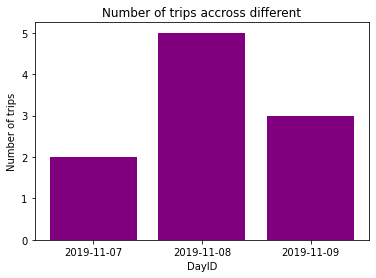

In [169]:
##  Filtering points from original trajectory dataframe
ftdf_ = filtering.filter(tdf, max_speed_kmh=500.)
print(ftdf_.parameters)

## Compressing results so that close enough points collapse into one location
## in US on average houses are about 2400 square feet. which leaves a max length less tham 1km
## we use 1km radius to compress point so that we are far enough between locations
ctdf_ = compression.compress(ftdf_, spatial_radius_km=1)
display(ctdf_.head(2))

## stop detection on compressed trajectory dataframe
stdf_ = detection.stops(ctdf_, stop_radius_factor=0.7, \
            minutes_for_a_stop=20.0, spatial_radius_km=1, 
                       leaving_time=True)

# # select all stops with began on 11/07 and ended 11/09
dt1 = stdf_.iloc[15]['datetime']
dt2 = stdf_.iloc[27]['leaving_datetime']
temp = stdf_[(stdf_.datetime >= dt1) 
                           & (stdf_.leaving_datetime <= dt2)].reset_index()

## Number of trips = number of stops -1 on reasonably compresses trajectory stops
temp['day'] = list(temp.datetime.dt.day)
y = temp.groupby('day')['day'].count().values -1

x = temp.datetime.dt.strftime('%Y-%m-%d').unique().astype(str)
x
plt.bar([1,2,3], y, color= 'purple')
plt.xticks(range(1,4),list(x))
plt.xlabel('DayID')
plt.ylabel('Number of trips')
plt.title('Number of trips accross different');


### 3. Calculate a the distribution for the duration of your stops. Similar to Fig 2B (10pts)

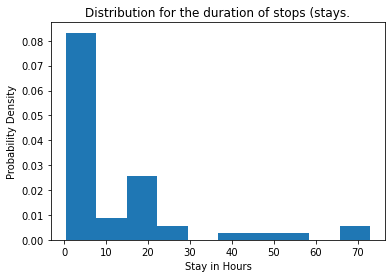

In [228]:
## sort values by arrival time at stops
stdf_ = stdf_.sort_values(by='datetime')

## find stop duration by difference between leaving time and arrival time in stops from
## stop detection  trajectory dataframe
stop_duration_hours = abs(stdf_.leaving_datetime - stdf_.datetime).dt.total_seconds() / 3600.0
plt.hist(stop_duration_hours, density=True)
plt.xlabel('Stay in Hours')
plt.ylabel('Probability Density')
plt.title('Distribution for the duration of stops (stays.');

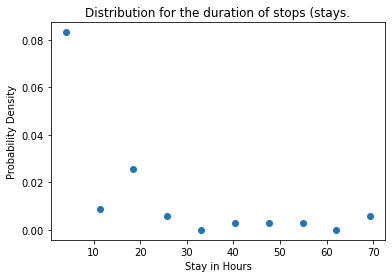

In [229]:
import numpy as np
x = np.random.randn(10000)
counts, bin_edges = np.histogram(stop_duration_hours, density=True)
# print(bin_edges)

bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = 0
plt.errorbar(bin_centres, counts, yerr=err, fmt='o')
plt.xlabel('Stay in Hours')
plt.ylabel('Probability Density')
plt.title('Distribution for the duration of stops (stays.');
# plt.show()

### 4. Calculate a distribution for the total traveled in your trips. See Fig 2C as guideline. (10 pts)


48


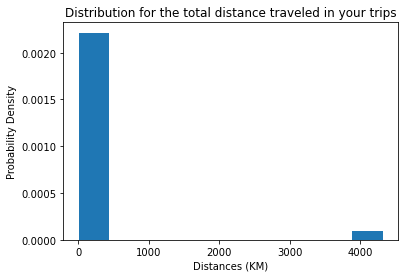

In [248]:
## calculate the distance between adjacent stops from the previously filtered and 
## adequately compressed stop detection  trajectory dataframe.
print(len(stdf_))
# Initialise empty distances list
distances = []
# loop through filtered and compressed stop detection dataframe
## and calculate adjacent distances
for i in range(len(stdf_)-1):
    start_loc = stdf_.iloc[i][['lat', 'lng']]
    end_loc = stdf_.iloc[i+1][['lat', 'lng']]
    # compute distance between origin and destination
    dist = getDistanceByHaversine(end_loc, start_loc)
    ## append dists to distances list
    distances.append(dist)
# distances
## plot histogram for distribution for the total traveled in your trips
plt.hist(distances, density=True, bins = 10)
plt.xlabel('Distances (KM)')
plt.ylabel('Probability Density')
plt.title('Distribution for the total distance traveled in your trips');

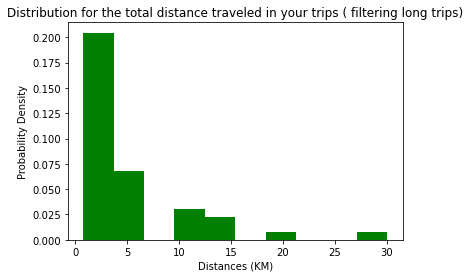

In [249]:
distances_filtered = np.array(distances)[np.array(distances) < 31]
## plot histogram for distribution for the total traveled in your trips
plt.hist(distances_filtered, density=True, bins = 10, color = 'green')
plt.xlabel('Distances (KM)')
plt.ylabel('Probability Density')
plt.title('Distribution for the total distance traveled in your trips ( filtering long trips)');

### 5. Calculate the distribution for the speed of your trips. (25 pts)

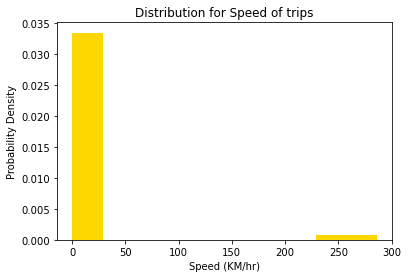

In [246]:
### calculate time between stop entry to estimate  duration of trips rom the previously filtered and 
## adequately compressed stop detection  trajectory dataframe.


## find time between arrivals at stops
trip_duration_hours  = []
# trip_duration_hours = []
for i in range(len(stdf_)-1):
    start_time_trip = stdf_.datetime[i]
    end_time_trip = stdf_.datetime[i+1]
    time = abs(end_time_trip - start_time_trip).total_seconds() / 3600.0
    ## append time for each trip into list
    trip_duration_hours.append(time)
trip_duration_hours = np.array(stopandtrip_duration_hours)

## calculate trip speed = distance/time
trip_speed_kmperhr = np.array(distances)/trip_duration_hours

trip_speed_kmperhr

## plot histogram for distribution for the total traveled in your trips
plt.hist(trip_speed_kmperhr, density=True, bins = 10, color = 'gold')
plt.xlabel('Speed (KM/hr)')
plt.ylabel('Probability Density')
plt.title('Distribution for Speed of trips');

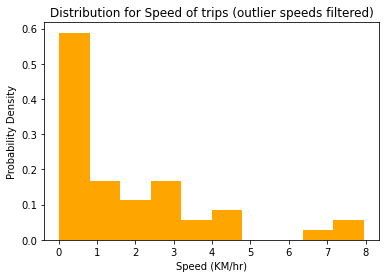

In [247]:
## filter our really fast speeds
speed_filtered = trip_speed_kmperhr[trip_speed_kmperhr < 50]
## plot histogram for distribution for the total traveled in your trips
plt.hist(speed_filtered, density=True, bins = 10, color = 'orange')
plt.xlabel('Speed (KM/hr)')
plt.ylabel('Probability Density')
plt.title('Distribution for Speed of trips (outlier speeds filtered)');

### Question 6, alternative method

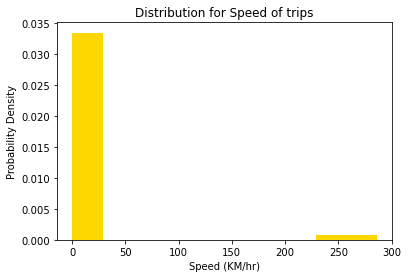

In [261]:
from skmob.measures.individual import waiting_times
## alternatively use wait time function to calculate time between trips
wt_df = waiting_times(stdf_)

## calculate trip speed = distance/time
trip_speed_kmperhr = (3600*np.array(distances))/wt_df.waiting_times[0]

trip_speed_kmperhr

## plot histogram for distribution for the total traveled in your trips
plt.hist(trip_speed_kmperhr, density=True, bins = 10, color = 'gold')
plt.xlabel('Speed (KM/hr)')
plt.ylabel('Probability Density')
plt.title('Distribution for Speed of trips');


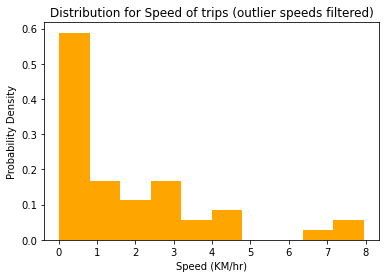

In [262]:
## filter our really fast speeds
speed_filtered = trip_speed_kmperhr[trip_speed_kmperhr < 50]
## plot histogram for distribution for the total traveled in your trips
plt.hist(speed_filtered, density=True, bins = 10, color = 'orange')
plt.xlabel('Speed (KM/hr)')
plt.ylabel('Probability Density')
plt.title('Distribution for Speed of trips (outlier speeds filtered)');

In [ ]:
## filter our really fast speeds
speed_filtered = trip_speed_kmperhr[trip_speed_kmperhr < 50]
## plot histogram for distribution for the total traveled in your trips
plt.hist(speed_filtered, density=True, bins = 10, color = 'orange')
plt.xlabel('Speed (KM/hr)')
plt.ylabel('Probability Density')
plt.title('Distribution for Speed of trips (outlier speeds filtered)');

### 6. Report the fraction of the total stays in each of your locations, similar to the P(L) vs. L of the Nature paper, presented in Fig 2C. . (25 pts)

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


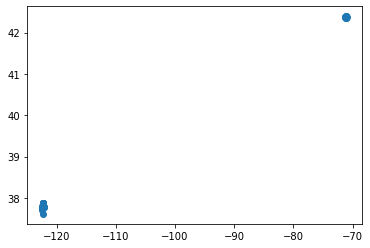

In [269]:
## to find locations, check distances between all stop points and 
## group points by proximity
from sklearn.cluster import KMeans
plt.scatter( stdf_.lng,stdf_.lat)

In [271]:
## divide data into 2 groups
stdf_cal = stdf_[stdf_.lat<=39]
stdf_bos = stdf_[stdf_.lat>=39]


#### For california

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


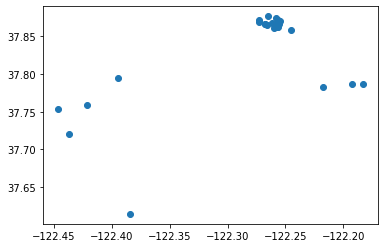

In [282]:
plt.scatter( stdf_cal.lng,stdf_cal.lat)

In [283]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
X = stdf_cal[['lat', 'lng']].values
Z = linkage(X,
            method='complete',  # dissimilarity metric: max distance across all pairs of 
                                # records between two clusters
            metric='euclidean'
    )                           # you can peek into the Z matrix to see how clusters are 
                                # merged at each iteration of the algorithm

# # calculate full dendrogram and visualize it
# plt.figure(figsize=(30, 10))
# dendrogram(Z)
# plt.show()

# retrive clusters with `max_d`
from scipy.cluster.hierarchy import fcluster
max_d = 0.05      # estimate 5 km is about 0.05
clusters = fcluster(Z, max_d, criterion='distance')
## add locations to data frame
stdf_cal['locations'] = clusters
## calculate number of stays per location by country size of clusters
temp_cal = stdf_cal.groupby('locations',as_index = False)['locations'].count()
temp_cal = temp_cal.rename(columns = {'locations':'n_stays'})
# temp_cal['fraction stays'] = temp_cal.n_stays/np.sum(temp_cal.n_stays)
temp_cal

#### For Boston

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


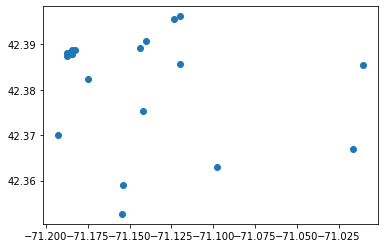

In [285]:
plt.scatter( stdf_bos.lng,stdf_bos.lat)

In [286]:
## for Boston
# generate the linkage matrix
X = stdf_bos[['lat', 'lng']].values
Z = linkage(X,
            method='complete',  # dissimilarity metric: max distance across all pairs of 
                                # records between two clusters
            metric='euclidean'
    )                           # you can peek into the Z matrix to see how clusters are 
                                # merged at each iteration of the algorithm

# # calculate full dendrogram and visualize it
# plt.figure(figsize=(30, 10))
# dendrogram(Z)
# plt.show()

# retrive clusters with `max_d` = 11 km
max_d = 0.05       # estimate 5 km is about 0.05
clusters_ = fcluster(Z, max_d, criterion='distance')

## add clusters to stop data frame
stdf_bos['locations'] = clusters_
## calculate number of stays per location by country size of clusters
temp_bos = stdf_bos.groupby('locations',as_index = False)['locations'].count()
temp_bos = temp_bos.rename(columns = {'locations':'n_stays'})
# temp_cal['fraction stays'] = temp_cal.n_stays/np.sum(temp_cal.n_stays)
temp_bos

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,n_stays
0,2
1,11
2,6
3,1


C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


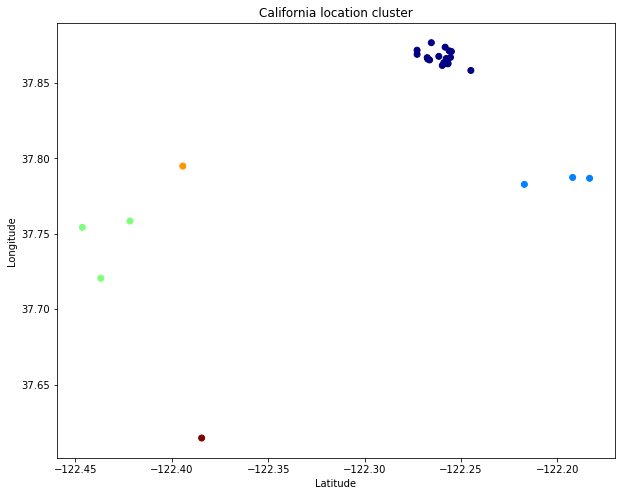

In [323]:
plt.figure(figsize=(10, 8))
plt.scatter( stdf_cal.lng,stdf_cal.lat, c=clusters, cmap = 'jet')  # plot points with cluster dependent colors
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.title('California location cluster')
plt.show()

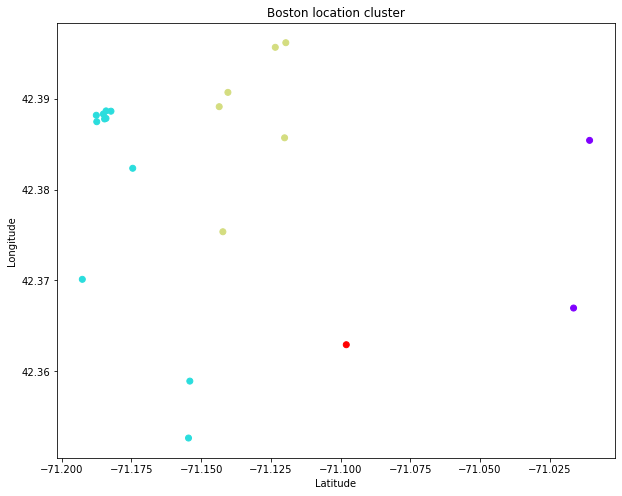

In [324]:
plt.figure(figsize=(10, 8))
plt.scatter( stdf_bos.lng,stdf_bos.lat, c=clusters_, cmap = 'rainbow')  # plot points with cluster dependent colors
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.title('Boston location cluster')
plt.show()

In [321]:
## merge data can calculate fraction of stays
temp_global = pd.concat([temp_cal, temp_bos])
temp_global['fraction stays'] = temp_global.n_stays/np.sum(temp_global.n_stays)
temp_global = temp_global.sort_values(by = 'n_stays',ascending = False).reset_index(drop=True)
temp_global = temp_global.reset_index()
temp_global = temp_global.rename(columns={'index':'Rank'})
temp_global.Rank = temp_global.Rank +1
temp_global

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Rank,n_stays,fraction stays
0,1,20,0.416667
1,2,11,0.229167
2,3,6,0.125000
3,4,3,0.062500
4,5,3,0.062500
5,6,2,0.041667
6,7,1,0.020833
7,8,1,0.020833
8,9,1,0.020833


C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


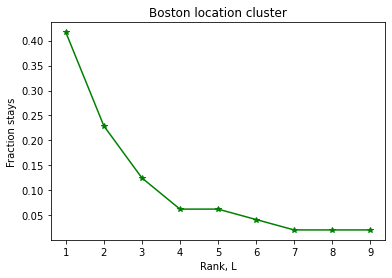

In [329]:
plt.plot(temp_global.Rank, temp_global['fraction stays'] ,'g-*')
plt.xlabel('Rank, L')
plt.ylabel('Fraction stays')
plt.title('Boston location cluster');

### 7. What is you Radius of Gyration? (10 pts)

In [267]:
from skmob.measures.individual import radius_of_gyration
rg_df = radius_of_gyration(stdf_)
rg_df.head()

C:\Users\mmoud\Anaconda3\envs\skmob\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,radius_of_gyration
0,2149.893436
